In [1]:
import os
from keras.models import Sequential
from keras.layers import Dense,Flatten,MaxPool2D,Conv2D

In [2]:
path = r'C:\Users\S AKHIL\Downloads\images'

In [3]:
os.listdir(path)

['test', 'train']

In [4]:
train_path = path + '\\train\\'
test_path = path+ '\\test\\'

In [5]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [6]:
train_genn = ImageDataGenerator(rescale=1./255,rotation_range=180,width_shift_range=0.2,height_shift_range=0.2,shear_range = 0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
train_img_gen = train_genn.flow_from_directory(directory=train_path,batch_size=20,target_size=(100, 100),class_mode='binary')

Found 478 images belonging to 2 classes.


In [7]:
test_genn = ImageDataGenerator(rescale=1./255)
test_img_gen = test_genn.flow_from_directory(test_path)

Found 168 images belonging to 2 classes.


In [8]:
model = Sequential()


model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(train_img_gen,epochs=20,validation_data=train_img_gen)

Epoch 1/20
24/24 [==============================] - 14s 516ms/step - loss: 0.7075 - accuracy: 0.4791 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 2/20
24/24 [==============================] - 12s 494ms/step - loss: 0.6845 - accuracy: 0.5335 - val_loss: 0.6837 - val_accuracy: 0.5481
Epoch 3/20
24/24 [==============================] - 12s 499ms/step - loss: 0.6604 - accuracy: 0.6151 - val_loss: 0.6265 - val_accuracy: 0.6569
Epoch 4/20
24/24 [==============================] - 12s 495ms/step - loss: 0.6737 - accuracy: 0.5816 - val_loss: 0.6466 - val_accuracy: 0.6046
Epoch 5/20
24/24 [==============================] - 12s 496ms/step - loss: 0.6317 - accuracy: 0.6423 - val_loss: 0.6068 - val_accuracy: 0.6674
Epoch 6/20
24/24 [==============================] - 12s 500ms/step - loss: 0.6488 - accuracy: 0.6130 - val_loss: 0.6192 - val_accuracy: 0.6339
Epoch 7/20
24/24 [==============================] - 13s 558ms/step - loss: 0.6143 - accuracy: 0.6527 - val_loss: 0.5983 - val_accuracy: 0.6820

In [11]:
model.history.history

{'loss': [0.7075467109680176,
  0.6844529509544373,
  0.6603897213935852,
  0.6737011671066284,
  0.6317269206047058,
  0.6488217115402222,
  0.6142517924308777,
  0.5930683612823486,
  0.5996707081794739,
  0.5817071795463562,
  0.5672332644462585,
  0.5928236246109009,
  0.6033757328987122,
  0.5756495594978333,
  0.5631784796714783,
  0.5468601584434509,
  0.5572730302810669,
  0.5406798720359802,
  0.5728105306625366,
  0.5259847044944763],
 'accuracy': [0.4790794849395752,
  0.5334727764129639,
  0.6150627732276917,
  0.581589937210083,
  0.642259418964386,
  0.6129707098007202,
  0.6527196764945984,
  0.6841003894805908,
  0.6589958071708679,
  0.6924686431884766,
  0.6945606470108032,
  0.6673640012741089,
  0.6589958071708679,
  0.6841003894805908,
  0.7092050313949585,
  0.7133890986442566,
  0.6945606470108032,
  0.7217572927474976,
  0.6987447738647461,
  0.7217572927474976],
 'val_loss': [0.6957445740699768,
  0.6836724877357483,
  0.6264617443084717,
  0.6465606689453125,


In [12]:
import pandas as pd

df = pd.DataFrame(model.history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.707547,0.479079,0.695745,0.500000
1,0.684453,0.533473,0.683672,0.548117
2,0.660390,0.615063,0.626462,0.656904
3,0.673701,0.581590,0.646561,0.604603
4,0.631727,0.642259,0.606757,0.667364
5,0.648822,0.612971,0.619160,0.633891
6,0.614252,0.652720,0.598324,0.682008
7,0.593068,0.684100,0.578275,0.679916
8,0.599671,0.658996,0.596542,0.673640
9,0.581707,0.692469,0.603424,0.646443


<Axes: >

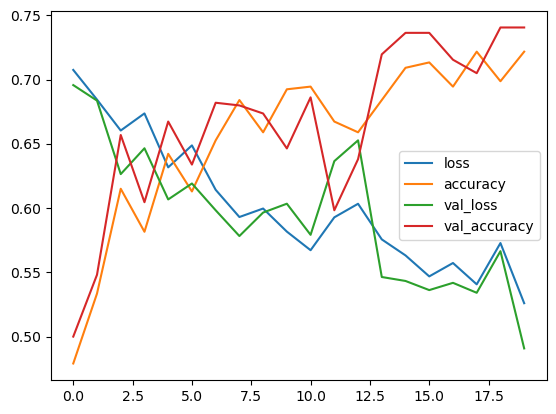

In [13]:
df.plot()

Text(0.5, 1.0, 'Model performance')

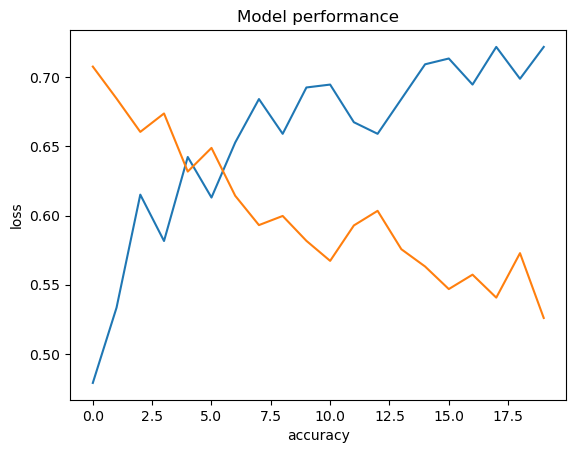

In [15]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['loss'])

plt.xlabel('accuracy')
plt.ylabel('loss')
plt.title('Model performance')

Text(0.5, 1.0, 'Model_validation ')

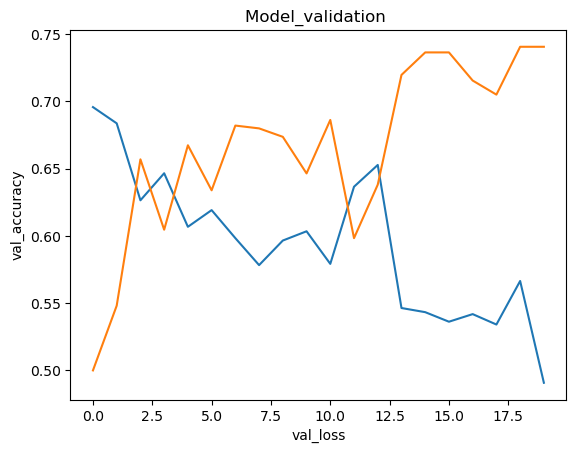

In [17]:
plt.plot(model.history.history['val_loss'])
plt.plot(model.history.history['val_accuracy'])
plt.xlabel('val_loss')
plt.ylabel('val_accuracy')
plt.title('Model_validation ')

In [18]:
model.save('cat_loaf')

INFO:tensorflow:Assets written to: cat_loaf\assets


INFO:tensorflow:Assets written to: cat_loaf\assets


In [21]:
import numpy as np
from keras.preprocessing import image
import keras

In [23]:
reuse = keras.models.load_model('cat_loaf')

In [79]:
os.listdir(test_path + '\\LOAF\\' )

['loaf_cat_1.jpg',
 'loaf_cat_10.jpg',
 'loaf_cat_11.jpg',
 'loaf_cat_12.jpg',
 'loaf_cat_13.jpg',
 'loaf_cat_15.jpg',
 'loaf_cat_18.jpg',
 'loaf_cat_19.jpg',
 'loaf_cat_2.jpg',
 'loaf_cat_20.jpeg',
 'loaf_cat_21.jpeg',
 'loaf_cat_22.jpg',
 'loaf_cat_23.jpg',
 'loaf_cat_24.png',
 'loaf_cat_25.jpg',
 'loaf_cat_26.jpg',
 'loaf_cat_27.jpg',
 'loaf_cat_28.jpg',
 'loaf_cat_29.jpg',
 'loaf_cat_3.jpg',
 'loaf_cat_30.jpg',
 'loaf_cat_31.jpg',
 'loaf_cat_32.jpg',
 'loaf_cat_33.jpg',
 'loaf_cat_34.jpg',
 'loaf_cat_35.jpg',
 'loaf_cat_36.jpg',
 'loaf_cat_37.jpg',
 'loaf_cat_38.jpg',
 'loaf_cat_39.jpg',
 'loaf_cat_4.jpg',
 'loaf_cat_40.jpg',
 'loaf_cat_41.jpg',
 'loaf_cat_42.jpg',
 'loaf_cat_43.jpg',
 'loaf_cat_44.jpg',
 'loaf_cat_45.jpg',
 'loaf_cat_46.jpg',
 'loaf_cat_47.jpg',
 'loaf_cat_48.jpg',
 'loaf_cat_49.jpg',
 'loaf_cat_5.jpg',
 'loaf_cat_50.jpg',
 'loaf_cat_51.jpg',
 'loaf_cat_52.jpg',
 'loaf_cat_53.jpg',
 'loaf_cat_54.jpg',
 'loaf_cat_55.jpg',
 'loaf_cat_56.jpg',
 'loaf_cat_57.jpg',
 'l

In [98]:
flow = test_path + '\\LOAF\\loaf_cat_73.jpg'
input_image_path =  flow
input_image = image.load_img(input_image_path, target_size=(100,100))
input_image_array = image.img_to_array(input_image)
input_image_array = np.expand_dims(input_image_array, axis=0)
input_image_array /= 255.0 

In [99]:
predicted_class=reuse.predict(input_image_array)

1/1 [==============================] - 0s 25ms/step


In [100]:
predicted_class=predicted_class.round(0)

In [101]:
class_names = train_img_gen.class_indices

In [102]:
for class_label, class_index in class_names.items():
    if predicted_class == class_index:
        name_predicted = class_label
print(name_predicted,class_index)

LOAF 1


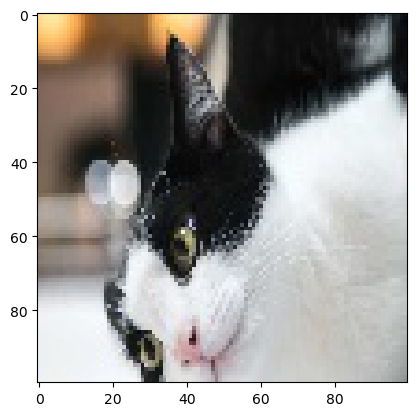

In [103]:
plt.imshow(plt.imread(flow))